## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_column', None)

## Read Data

SessionNo: no urut session.

startHour: jam session dimulai

startWeekDay: hari session dimulai (1=senin, 2:selasa dst)

duration: waktu dalam detik yang sudah berlalu sejak session dimulai.

cCount: jumlah produk yang diklik

cMinPrice: harga terendah produk yang diklik.

cMaxPrice: harga tertinggi produk yang diklik.

cSumPrice: harga total produk yang diklik.

bStep, tahapan pembelian (1,2,3,4,5)

onlineStatus, apakah user online y=yes,  n=no.

availability: status pengiriman

customerID: nomor user

maxVal: maksimum harga pembelian yang diperbolehkan untuk user tsb.

customerScore: skor user dari sudut pandang toko online.

accountLifeTime: umur account dalam bulan.

payment: jumlah payment yang dihasilkan oleh customer

age: umur user

address: Panggilan user 1:Mr; 2:Mrs; 3: perusahaan

lastOrder: waktu dalam hari sejak order terakhir.

order: ini atribut yang akan diprediksi. y: membeli, n:tidak membeli.

In [2]:
df = pd.read_csv("K:\\dmw\\kuis\\train_uas_des_18.txt",sep="|",na_values=["?"]) ##replace ? sebagai nan

In [3]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,59.99,59.99,NaN,NaN,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,59.99,59.99,2.0,y,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,59.99,59.99,NaN,y,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 24 columns):
sessionNo          100002 non-null int64
startHour          100002 non-null int64
startWeekday       100002 non-null int64
duration           100002 non-null float64
cCount             100002 non-null int64
cMinPrice          99195 non-null float64
cMaxPrice          99195 non-null float64
cSumPrice          99195 non-null float64
bCount             100002 non-null int64
bMinPrice          98497 non-null float64
bMaxPrice          98497 non-null float64
bSumPrice          98497 non-null float64
bStep              56812 non-null float64
onlineStatus       63417 non-null object
availability       62084 non-null object
customerNo         63306 non-null float64
maxVal             62871 non-null float64
customerScore      62871 non-null float64
accountLifetime    62871 non-null float64
payments           63306 non-null float64
age                63219 non-null float64
address      

terdapat 100002 record

## EXPLORATORY DATA ANALYSIS

### Data Hilang

In [5]:
df = df[df.isna().sum(axis=1) < 15]


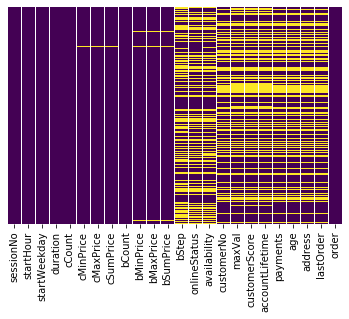

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

In [8]:
df_na = [f for f in df.columns if df[f].isna().sum()>0]

In [9]:
for f in df_na:
    print(f, np.round(df[f].isna().mean()*100,4), '%')

cMinPrice 0.5295 %
cMaxPrice 0.5295 %
cSumPrice 0.5295 %
bMinPrice 1.2294 %
bMaxPrice 1.2294 %
bSumPrice 1.2294 %
bStep 43.0482 %
onlineStatus 36.4861 %
availability 37.8047 %
customerNo 36.5182 %
maxVal 36.9544 %
customerScore 36.9544 %
accountLifetime 36.9544 %
payments 36.5182 %
age 36.6054 %
address 36.5182 %
lastOrder 36.5182 %


Dapat dilihat bahwa cukup banyak data yang hilang dan yang paling banyak ada pada bStep yaitu 43%, yang merupakan data tahapan pembelian.

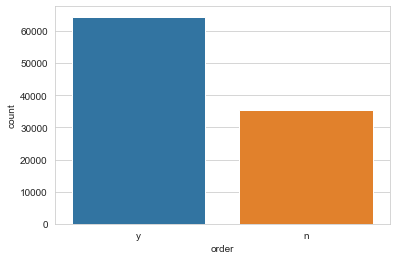

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='order',data = df) ## visualisasi data yang melakukan order dan tidak

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 24 columns):
sessionNo          99723 non-null int64
startHour          99723 non-null int64
startWeekday       99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99195 non-null float64
cMaxPrice          99195 non-null float64
cSumPrice          99195 non-null float64
bCount             99723 non-null int64
bMinPrice          98497 non-null float64
bMaxPrice          98497 non-null float64
bSumPrice          98497 non-null float64
bStep              56794 non-null float64
onlineStatus       63338 non-null object
availability       62023 non-null object
customerNo         63306 non-null float64
maxVal             62871 non-null float64
customerScore      62871 non-null float64
accountLifetime    62871 non-null float64
payments           63306 non-null float64
age                63219 non-null float64
address            6

ratio = 2:1

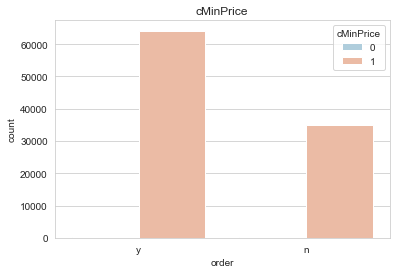

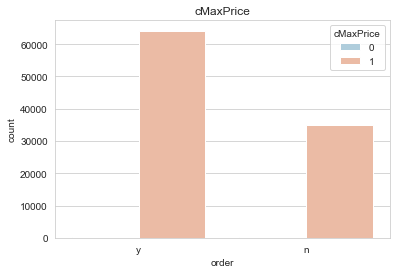

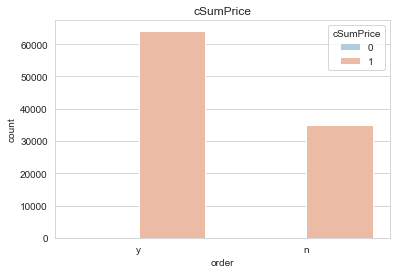

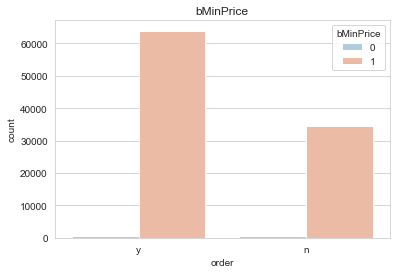

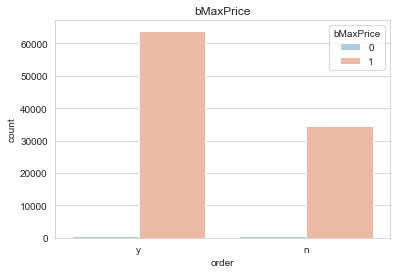

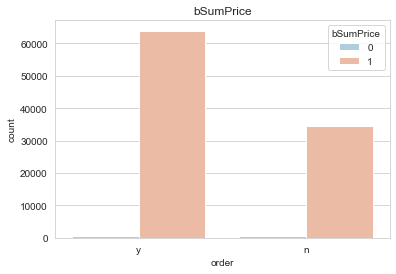

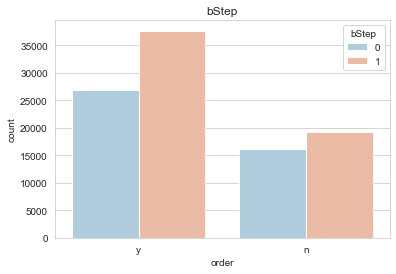

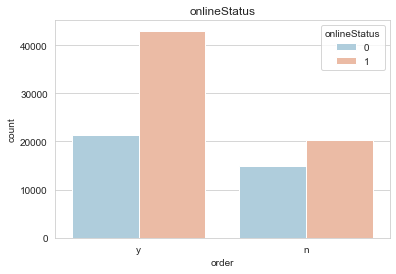

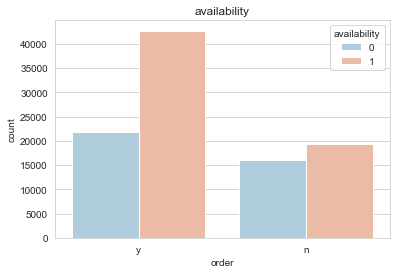

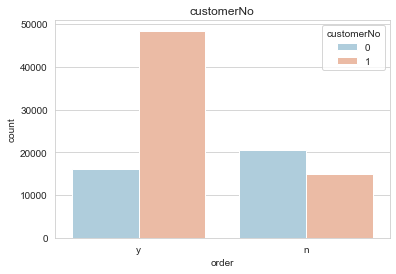

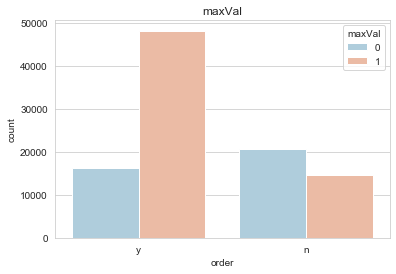

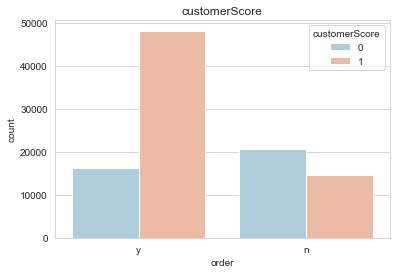

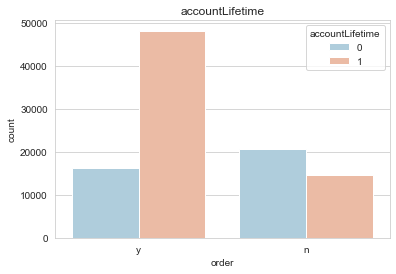

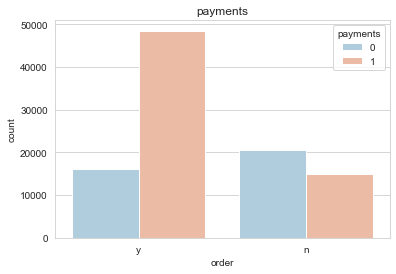

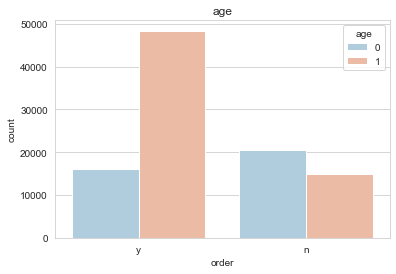

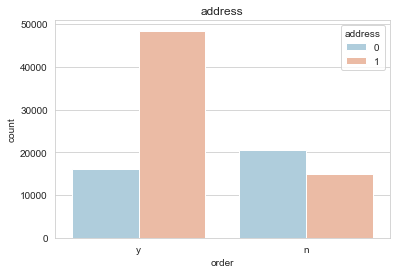

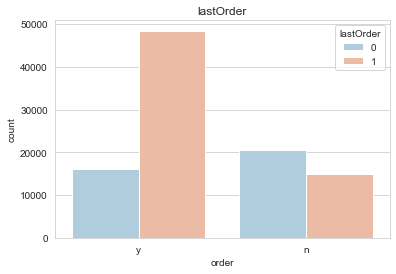

In [12]:
data = df.copy()
# data.info()
# data.loc[df['order']=="y",'order']= 1
# data.loc[df['order']=="n",'order']= 0
for f in df_na:
    data_na = data.copy()
    data_na[f] =  np.where(data_na[f].isna(),0,1) ## definisikan 0 sebagai data yang nan, 1 data yang bukan nan
    sns.countplot(x='order',hue = f ,data = data_na,palette='RdBu_r')
    plt.title(f)
    plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 24 columns):
sessionNo          99723 non-null int64
startHour          99723 non-null int64
startWeekday       99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99195 non-null float64
cMaxPrice          99195 non-null float64
cSumPrice          99195 non-null float64
bCount             99723 non-null int64
bMinPrice          98497 non-null float64
bMaxPrice          98497 non-null float64
bSumPrice          98497 non-null float64
bStep              56794 non-null float64
onlineStatus       63338 non-null object
availability       62023 non-null object
customerNo         63306 non-null float64
maxVal             62871 non-null float64
customerScore      62871 non-null float64
accountLifetime    62871 non-null float64
payments           63306 non-null float64
age                63219 non-null float64
address            6

Visualisasi di atas menggambarkan apakah atribut dengan value NaN mempengaruhi order atau tidak, berdasarkan visualisasi di atas didapatkan bahwa meskipun terdapat nilai NaN, tetapi order tetap memiliki value, artinya order bisa jadi dipengaruhi oleh attribut yang lainnya juga.

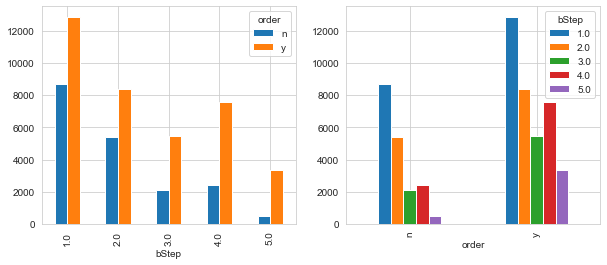

In [14]:
df2 = df.groupby(["bStep", "order"]).size().reset_index(name='Count')


df3 = pd.pivot_table(df2,  values='Count',  columns=['order'],  index = "bStep",
                         aggfunc=np.sum,  fill_value=0)
df4 = pd.pivot_table(df2,  values='Count',  columns=['bStep'],  index = "order",
                         aggfunc=np.sum,  fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
df3.plot(kind="bar", ax=ax[0])
df4.plot(kind="bar", ax=ax[1]) 

plt.show()

#### plot diatas merupakan keterkaitan order dengan bStep

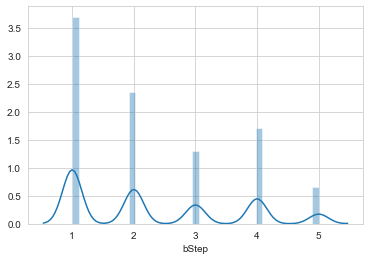

In [15]:
sns.distplot(df.bStep.dropna())

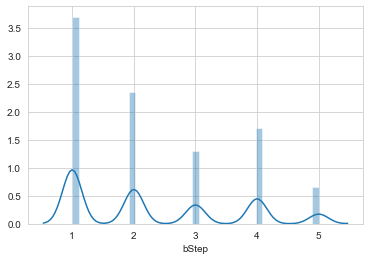

In [16]:
sns.distplot(df.bStep.dropna())

In [17]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

In [18]:
df.head(20)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,59.99,59.99,NaN,NaN,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,59.99,59.99,2.0,y,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,59.99,59.99,NaN,y,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
5,2,6,5,26.235,0,NaN,NaN,NaN,0,NaN,NaN,NaN,4.0,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
6,2,6,5,71.200,0,NaN,NaN,NaN,0,NaN,NaN,NaN,4.0,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
8,3,6,5,181.477,9,29.99,29.99,89.97,1,29.99,29.99,29.99,NaN,NaN,NaN,3.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,y
9,3,6,5,297.018,11,9.99,29.99,109.95,2,9.99,29.99,39.98,NaN,NaN,NaN,3.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,y
10,3,6,5,310.967,11,9.99,29.99,109.95,2,9.99,29.99,39.98,NaN,y,completely orderable,3.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,y
11,3,6,5,324.278,11,9.99,29.99,109.95,2,9.99,29.99,39.98,4.0,y,completely orderable,3.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,y


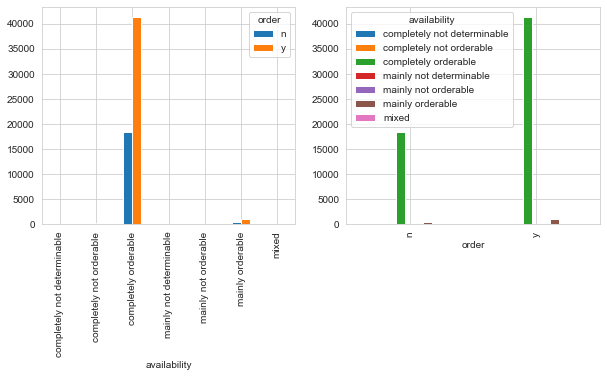

In [19]:
df2 = df.groupby(["availability", "order"]).size().reset_index(name='Count')


df3 = pd.pivot_table(df2,  values='Count',  columns=['order'],  index = "availability",
                         aggfunc=np.sum,  fill_value=0)
df4 = pd.pivot_table(df2,  values='Count',  columns=['availability'],  index = "order",
                         aggfunc=np.sum,  fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
df3.plot(kind="bar", ax=ax[0])
df4.plot(kind="bar", ax=ax[1]) 

plt.show()

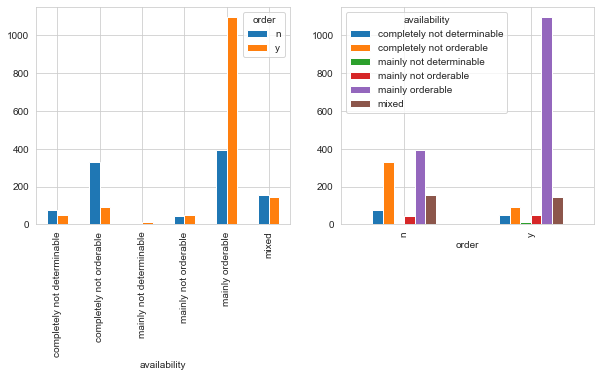

In [20]:
a = df.loc[(df['availability']!='completely orderable')]
df2 = a.groupby(["availability", "order"]).size().reset_index(name='Count')


df3 = pd.pivot_table(df2,  values='Count',  columns=['order'],  index = "availability",
                         aggfunc=np.sum,  fill_value=0)
df4 = pd.pivot_table(df2,  values='Count',  columns=['availability'],  index = "order",
                         aggfunc=np.sum,  fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
df3.plot(kind="bar", ax=ax[0])
df4.plot(kind="bar", ax=ax[1]) 

plt.show()

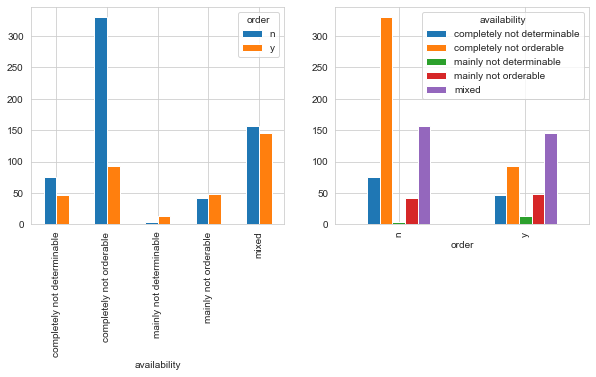

In [21]:
a = df.loc[(df['availability']!='completely orderable')&(df['availability']!='mainly orderable')]
df2 = a.groupby(["availability", "order"]).size().reset_index(name='Count')


df3 = pd.pivot_table(df2,  values='Count',  columns=['order'],  index = "availability",
                         aggfunc=np.sum,  fill_value=0)
df4 = pd.pivot_table(df2,  values='Count',  columns=['availability'],  index = "order",
                         aggfunc=np.sum,  fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
df3.plot(kind="bar", ax=ax[0])
df4.plot(kind="bar", ax=ax[1]) 

plt.show()

#### Plot diatas adalah penyebaran availibility pada dataset ini

In [22]:
pd.pivot_table(df, 'bStep',['order','availability'],aggfunc='count')

bStep
order availability                      
n     completely not determinable     76
      completely not orderable       325
      completely orderable         17164
      mainly not determinable          3
      mainly not orderable            42
      mainly orderable               391
      mixed                          156
y     completely not determinable     47
      completely not orderable        93
      completely orderable         35898
      mainly not determinable         14
      mainly not orderable            49
      mainly orderable              1091
      mixed                          143

In [23]:
pd.pivot_table(df, 'availability',['order'],aggfunc='count')

,availability
order,
n,19313
y,42710


In [24]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

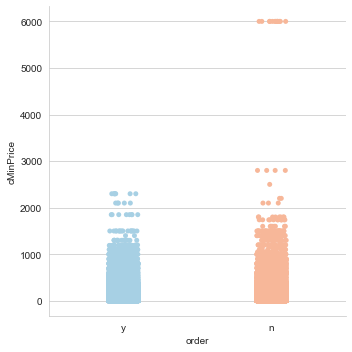

In [25]:
sns.catplot(x='order', y='cMinPrice', hue = 'order' ,data = data_na,palette='RdBu_r')

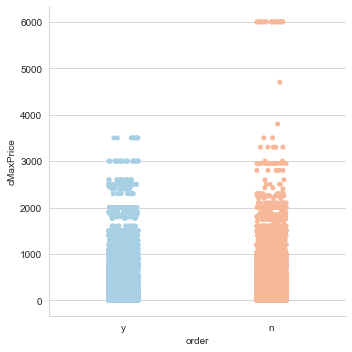

In [26]:
sns.catplot(x='order', y='cMaxPrice', hue = 'order' ,data = data_na,palette='RdBu_r')

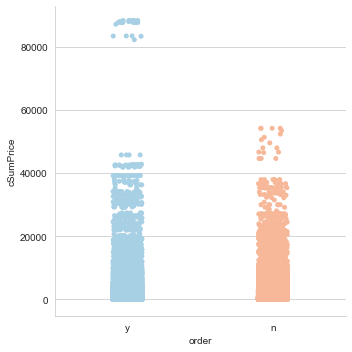

In [27]:
sns.catplot(x='order', y='cSumPrice', hue = 'order' ,data = data_na,palette='RdBu_r')

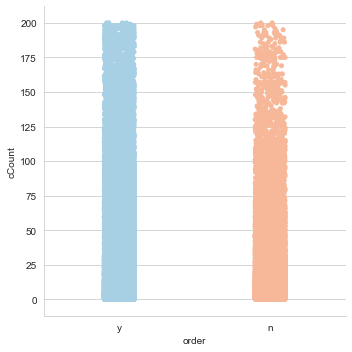

In [28]:
sns.catplot(x='order', y='cCount', hue = 'order' ,data = data_na,palette='RdBu_r')

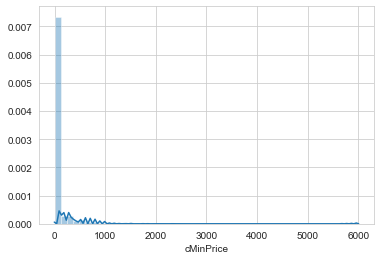

In [29]:
sns.distplot(df.cMinPrice.dropna())

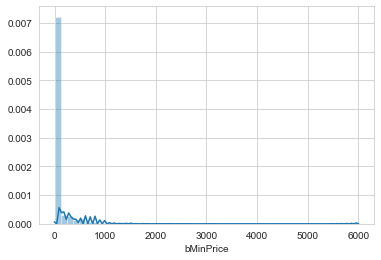

In [30]:
sns.distplot(df.bMinPrice.dropna())

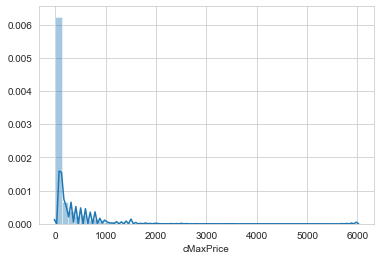

In [31]:
sns.distplot(df.cMaxPrice.dropna())

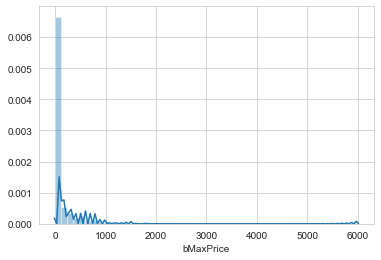

In [32]:
sns.distplot(df.bMaxPrice.dropna())

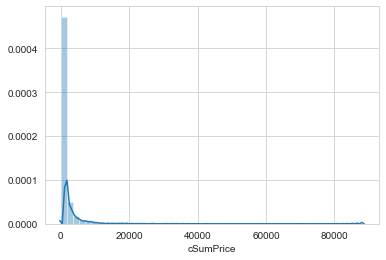

In [33]:
sns.distplot(df.cSumPrice.dropna())

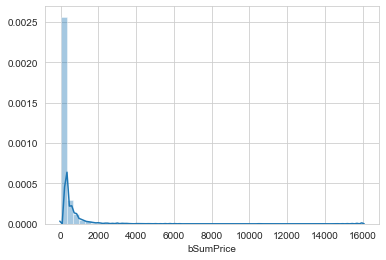

In [34]:
sns.distplot(df.bSumPrice.dropna())

Visualisasi C*

In [35]:
len(df.loc[(df.maxVal > df.bSumPrice)])

59622

In [36]:
len(df.loc[(df.maxVal > df.bSumPrice) & (df.order == 'y')])

46441

In [37]:
len(df.loc[(df.maxVal > df.bSumPrice) & (df.order == 'n')])

13181

In [38]:
len(df.loc[(df.maxVal < df.bSumPrice)])

2504

In [39]:
len(df.loc[(df.maxVal < df.bSumPrice) & (df.order == 'y')])

1373

In [40]:
len(df.loc[(df.maxVal < df.bSumPrice) & (df.order == 'n')])

1131

##### Berdasarkan syntax diatas dapat dikatakan bahwa cukup banyak yang maxValnya lebih besar dari bSumPrice dan melakukan order (masuk akal), akan tetapi ada juga yang maxValnya lebih kecil dari pada jumlah total harga barang di basket tetapi melakukan order (bisa jadi tidak semua barang di basket dilakukan order).

In [41]:
len(df.loc[(df.customerNo.isna()) & (df.age.isna())])


36417

In [42]:
len(df.loc[(df.customerNo.notna()) & (df.customerScore.isna())])+len(df.loc[(df.customerNo.isna()) & (df.customerScore.isna())])


36852

In [43]:
len(df.loc[(df.customerNo.isna()) & (df.order=='y')])

15986

In [44]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

Berdasarkan syntax di atas artinya data yang tidak memiliki customerNo, juga tidak memiliki address, lastOrder, payments, customerScore, maxVal, accountLifetime, age. Bisa jadi data tersebut merupakan user anonymous, apabila demikian artinya toko online tersebut memperbolehkan anonymous user untuk melakukan order dikarenakan terdapat 15986 data yang tidak memiliki costumerNo akan tetapi melakukan order (ordernya 'y')

Kemudian kita dapat mengisi nilai na pada customerNo sebagai '?'

terdapat juga data yang memiliki custumerNo akan tetapi tidak ada maxVal, custScore, account lifetime, artinya bisa jadi nilai yang hilang dapat kita ambil dari customerNo yang ada

In [45]:
df.loc[(df.customerNo.notna()) & (df.customerScore.isna())]

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
935,139,6,5,0.000,1,9.99,9.99,9.99,1,9.99,9.99,9.99,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
936,139,6,5,0.000,2,9.99,19.99,29.98,2,9.99,19.99,29.98,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
937,139,6,5,0.000,3,9.99,19.99,45.97,3,9.99,19.99,45.97,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
938,139,6,5,0.000,4,9.99,19.99,65.96,4,9.99,19.99,65.96,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
939,139,6,5,0.000,5,7.00,19.99,72.96,5,7.00,19.99,72.96,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91535,10993,17,5,810.425,12,29.99,29.99,359.88,1,29.99,29.99,29.99,NaN,NaN,NaN,5430.0,NaN,NaN,NaN,0.0,20.0,2.0,17.0,y
91536,10993,17,5,828.487,12,29.99,29.99,359.88,1,29.99,29.99,29.99,NaN,y,completely orderable,5430.0,NaN,NaN,NaN,0.0,20.0,2.0,17.0,y
95461,11415,17,5,550.871,18,7.99,25.20,93.69,1,7.99,7.99,7.99,NaN,NaN,NaN,5647.0,NaN,NaN,NaN,0.0,42.0,2.0,15.0,n
95462,11415,17,5,610.129,18,7.99,25.20,93.69,1,7.99,7.99,7.99,2.0,y,completely orderable,5647.0,NaN,NaN,NaN,0.0,42.0,2.0,15.0,n


In [46]:
df.loc[(df.customerNo == 56)]

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
935,139,6,5,0.000,1,9.99,9.99,9.99,1,9.99,9.99,9.99,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
936,139,6,5,0.000,2,9.99,19.99,29.98,2,9.99,19.99,29.98,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
937,139,6,5,0.000,3,9.99,19.99,45.97,3,9.99,19.99,45.97,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
938,139,6,5,0.000,4,9.99,19.99,65.96,4,9.99,19.99,65.96,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
939,139,6,5,0.000,5,7.00,19.99,72.96,5,7.00,19.99,72.96,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
940,139,6,5,0.000,6,7.00,19.99,80.95,6,7.00,19.99,80.95,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
941,139,6,5,265.944,25,5.99,19.99,265.79,7,7.00,19.99,88.94,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
942,139,6,5,275.119,25,5.99,19.99,265.79,7,7.00,19.99,88.94,1.0,y,mainly orderable,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
943,139,6,5,293.198,25,5.99,19.99,265.79,7,7.00,19.99,88.94,1.0,y,completely orderable,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n
944,139,6,5,358.732,26,5.99,19.99,273.78,7,7.00,19.99,88.94,2.0,y,completely orderable,56.0,NaN,NaN,NaN,0.0,46.0,1.0,20.0,n


In [47]:
temp_mv = df.loc[(df.customerNo.notna()) & (df.customerScore.isna())]

In [48]:
mv_na = temp_mv.customerNo.unique()

In [49]:
for a in mv_na:
    if (len(df.loc[(df.customerNo == 56) & (df.customerScore.notna())])>0):
        print(a, 'true')
    else:
        print(a,' false')

56.0  false
76.0  false
146.0  false
257.0  false
277.0  false
353.0  false
596.0  false
787.0  false
789.0  false
790.0  false
796.0  false
882.0  false
1173.0  false
1554.0  false
1588.0  false
1653.0  false
1825.0  false
1840.0  false
1878.0  false
1921.0  false
2219.0  false
2226.0  false
2617.0  false
2623.0  false
2642.0  false
2782.0  false
3503.0  false
3630.0  false
3660.0  false
3710.0  false
3986.0  false
4023.0  false
4152.0  false
4177.0  false
4222.0  false
4244.0  false
4545.0  false
4616.0  false
4951.0  false
4965.0  false
5003.0  false
5220.0  false
5430.0  false
5647.0  false


setelah diperiksa kembali ternyata customerNo yang tidak memiliki maxVal, customerScore, accountlifetime memang tidak memiliki nilai dari kolom tersebut.

In [50]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

In [51]:
df.loc[(df.customerNo.notna()) & (df.age.isna())]

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
12852,1649,9,5,51.191,5,15.95,21.95,69.80,1,15.95,15.95,15.95,NaN,NaN,NaN,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12853,1649,9,5,101.421,7,15.95,21.95,101.70,2,15.95,15.95,31.90,NaN,NaN,NaN,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12854,1649,9,5,161.991,9,15.95,21.95,133.60,2,15.95,15.95,31.90,2.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12855,1649,9,5,389.152,9,15.95,21.95,133.60,2,15.95,15.95,31.90,NaN,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12856,1649,9,5,1122.989,10,15.95,21.95,133.60,2,15.95,15.95,31.90,1.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99422,11848,18,5,12073.431,93,5.99,1499.00,3712.55,7,17.99,39.95,194.85,1.0,y,completely orderable,5863.0,800.0,465.0,66.0,0.0,NaN,1.0,26.0,y
99423,11848,18,5,12123.363,93,5.99,1499.00,3712.55,7,17.99,39.95,194.85,1.0,y,completely orderable,5863.0,800.0,465.0,66.0,0.0,NaN,1.0,26.0,y
99424,11848,18,5,12222.817,98,5.99,1499.00,3742.54,7,17.99,39.95,194.85,NaN,y,completely orderable,5863.0,800.0,465.0,66.0,0.0,NaN,1.0,26.0,y
99425,11848,18,5,12255.232,98,5.99,1499.00,3742.54,7,17.99,39.95,194.85,3.0,y,completely orderable,5863.0,800.0,465.0,66.0,0.0,NaN,1.0,26.0,y


In [52]:
df.loc[(df.customerNo == 796)]

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
12852,1649,9,5,51.191,5,15.95,21.95,69.80,1,15.95,15.95,15.95,NaN,NaN,NaN,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12853,1649,9,5,101.421,7,15.95,21.95,101.70,2,15.95,15.95,31.90,NaN,NaN,NaN,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12854,1649,9,5,161.991,9,15.95,21.95,133.60,2,15.95,15.95,31.90,2.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12855,1649,9,5,389.152,9,15.95,21.95,133.60,2,15.95,15.95,31.90,NaN,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12856,1649,9,5,1122.989,10,15.95,21.95,133.60,2,15.95,15.95,31.90,1.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12857,1649,9,5,1156.733,11,15.95,21.95,149.55,2,15.95,15.95,31.90,1.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12858,1649,9,5,1239.909,13,4.99,21.95,154.54,3,15.95,15.95,31.90,NaN,NaN,NaN,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12859,1649,9,5,1299.498,13,4.99,21.95,154.54,3,15.95,15.95,31.90,1.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12860,1649,9,5,1357.811,13,4.99,21.95,154.54,3,15.95,15.95,31.90,NaN,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y
12861,1649,9,5,1369.548,13,4.99,21.95,154.54,3,15.95,15.95,31.90,4.0,y,completely orderable,796.0,NaN,NaN,NaN,0.0,NaN,1.0,14.0,y


In [53]:
temp_age = df.loc[(df.customerNo.notna()) & (df.age.isna())]

In [54]:
ages_na = temp_age.customerNo.unique()

In [55]:
ages_na

array([ 796., 2897., 3450., 4030., 4358., 4480., 4601., 4721., 5863.])

In [56]:
for a in ages_na:
    if (len(df.loc[(df.customerNo == 56) & (df.customerScore.notna())])>0):
        print(a, 'true')
    else:
        print(a,' false')

796.0  false
2897.0  false
3450.0  false
4030.0  false
4358.0  false
4480.0  false
4601.0  false
4721.0  false
5863.0  false


In [57]:
inters =np.intersect1d(mv_na, ages_na)

In [58]:
inters

array([796.])

yang berirsan antara data yang tidak memiliki maxval dan tidak memiliki age hanya data dengan customerNo 796

In [59]:
z = df.loc[(df.address==3)]
z.age.unique()

array([21., 29., 36., 28., 42.])

In [60]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

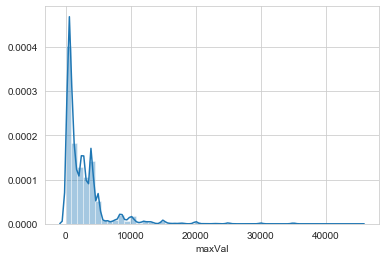

In [61]:
sns.distplot(df.maxVal.dropna())

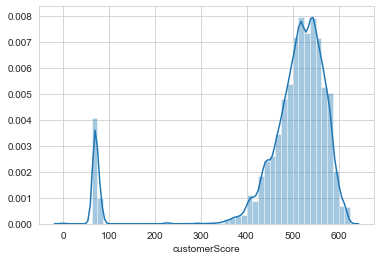

In [62]:
sns.distplot(df.customerScore.dropna())

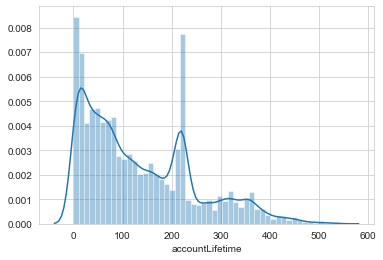

In [63]:
sns.distplot(df.accountLifetime.dropna())

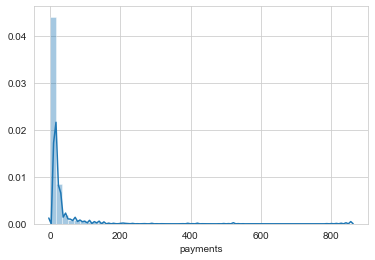

In [64]:
sns.distplot(df.payments.dropna())

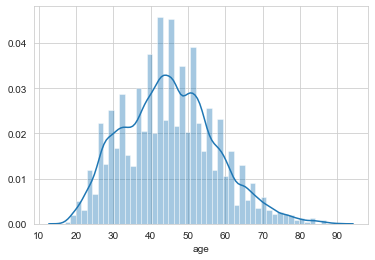

In [65]:
sns.distplot(df.age.dropna())

### #Tahap 2
## Feature Engineering

In [66]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       37700
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

#### Menghandle missing value pada availibility
dibedakan antara yang ordernya y dan n, dengan tetap mempertahankan polda distribusi yang ada.

In [67]:

order_y = df.loc[df.order=='y']#untuk yang y

s = order_y.availability.value_counts(normalize=True)
print(s)



completely orderable           0.966191
mainly orderable               0.025661
mixed                          0.003395
completely not orderable       0.002177
mainly not orderable           0.001147
completely not determinable    0.001100
mainly not determinable        0.000328
Name: availability, dtype: float64


In [68]:
missing = (df['availability'].isnull()) & (df['order'] == 'y')
df.loc[missing,'availability'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [69]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            528
cMaxPrice            528
cSumPrice            528
bCount                 0
bMinPrice           1226
bMaxPrice           1226
bSumPrice           1226
bStep              42929
onlineStatus       36385
availability       15961
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

In [70]:

order_n = df.loc[df.order=='n'] #untuk yang n

s = order_n.availability.value_counts(normalize=True)
print(s)



completely orderable           0.948273
mainly orderable               0.020297
completely not orderable       0.017087
mixed                          0.008077
completely not determinable    0.003935
mainly not orderable           0.002175
mainly not determinable        0.000155
Name: availability, dtype: float64


In [71]:
missing = (df['availability'].isnull()) & (df['order'] == 'n')
df.loc[missing,'availability'] = np.random.choice(s.index, size=len(df.loc[missing]),p=s.values)

##### mengisi nan value pada bstep dengan tetap menggunakan penyebaran yang sama

In [72]:
s = df.bStep.value_counts(normalize=True) #ambil probabilitasnya untuk memperoleh weight random
print(s)

1.0    0.379952
2.0    0.242262
4.0    0.176286
3.0    0.133324
5.0    0.068176
Name: bStep, dtype: float64


In [73]:
missing = df['bStep'].isnull()
df.loc[missing,'bStep'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

##### mengisi MinPrice MaxPrice SumPrice dengan menggunakan median masing masing, hal ini disebabkan karena distribusinya yang cenderung skewed

In [74]:
df['cMinPrice'].fillna(df['cMinPrice'].median(), inplace=True)

In [75]:
df['cMaxPrice'].fillna(df['cMaxPrice'].median(), inplace=True)
df['cSumPrice'].fillna(df['cSumPrice'].median(), inplace=True)
df['bMinPrice'].fillna(df['bMinPrice'].median(), inplace=True)
df['bMaxPrice'].fillna(df['bMaxPrice'].median(), inplace=True)
df['bSumPrice'].fillna(df['bSumPrice'].median(), inplace=True)

In [76]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice              0
cMaxPrice              0
cSumPrice              0
bCount                 0
bMinPrice              0
bMaxPrice              0
bSumPrice              0
bStep                  0
onlineStatus       36385
availability           0
customerNo         36417
maxVal             36852
customerScore      36852
accountLifetime    36852
payments           36417
age                36504
address            36417
lastOrder          36417
order                  0
dtype: int64

#### mengisi data yang hilang yang beririsan dengan CustNo yang hilang dengan menggunakan median masing-masing

In [77]:
missing = df['customerNo'].isnull()
df.loc[missing,'maxVal'] = df.maxVal.median()

In [78]:
df.loc[missing,'customerScore'] = df.customerScore.median()
df.loc[missing,'accountLifetime'] = df.accountLifetime.median()
df.loc[missing,'payments'] = df.payments.median()
df.loc[missing,'lastOrder'] = df.lastOrder.median()

#### sementara age dan address diisi menggunakan penyebaran yang sudah ada

In [79]:
s = df.age.value_counts(normalize=True)
print(s)
df.loc[missing,'age'] = np.random.choice(s.index, size=len(df[missing]),p=s.values) 



46.0    0.036824
43.0    0.035954
44.0    0.033613
53.0    0.032601
47.0    0.031747
          ...   
86.0    0.000506
83.0    0.000411
18.0    0.000348
90.0    0.000206
17.0    0.000095
Name: age, Length: 71, dtype: float64


In [80]:
s = df.address.value_counts(normalize=True)
print(s)
df.loc[missing,'address'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

2.0    0.731558
1.0    0.267463
3.0    0.000979
Name: address, dtype: float64


In [81]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice              0
cMaxPrice              0
cSumPrice              0
bCount                 0
bMinPrice              0
bMaxPrice              0
bSumPrice              0
bStep                  0
onlineStatus       36385
availability           0
customerNo         36417
maxVal               435
customerScore        435
accountLifetime      435
payments               0
age                   87
address                0
lastOrder              0
order                  0
dtype: int64

#### kemudian mengisi data hilang sisanya dengan median yang terbaru

In [82]:
missing = df['maxVal'].isnull()
df.loc[missing,'maxVal'] = df.maxVal.median()
df.loc[missing,'customerScore'] = df.customerScore.median()
df.loc[missing,'accountLifetime'] = df.accountLifetime.median()
s = df.age.value_counts(normalize=True)
print(s)
df.loc[missing,'age'] = np.random.choice(s.index, size=len(df[missing]),p=s.values) 



46.0    0.036714
43.0    0.036081
44.0    0.033954
47.0    0.032518
51.0    0.032478
          ...   
86.0    0.000512
83.0    0.000432
18.0    0.000361
90.0    0.000221
17.0    0.000090
Name: age, Length: 71, dtype: float64


In [83]:
missing = df['age'].isnull()
s = df.age.value_counts(normalize=True)
print(s)
df.loc[missing,'age'] = np.random.choice(s.index, size=len(df[missing]),p=s.values) 

46.0    0.036465
43.0    0.036235
44.0    0.034067
53.0    0.032692
51.0    0.032401
          ...   
86.0    0.000512
83.0    0.000442
18.0    0.000361
90.0    0.000221
17.0    0.000090
Name: age, Length: 71, dtype: float64


In [84]:
df.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice              0
cMaxPrice              0
cSumPrice              0
bCount                 0
bMinPrice              0
bMaxPrice              0
bSumPrice              0
bStep                  0
onlineStatus       36385
availability           0
customerNo         36417
maxVal                 0
customerScore          0
accountLifetime        0
payments               0
age                    0
address                0
lastOrder              0
order                  0
dtype: int64

data hilang sudah teratasi

In [85]:
pd.pivot_table(df, 'bStep',['order','onlineStatus'],aggfunc='count')

bStep
order onlineStatus       
n     n               157
      y             20178
y     n               185
      y             42818

Saya mengasumsikan sessionNo, starweekday, onlineStatus, dan custNo, merupakan data yang kurang relevan

In [86]:
df = df.drop(['sessionNo', 'startWeekday','onlineStatus','customerNo'],axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null float64
availability       99723 non-null object
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null float64
lastOrder          99723 non-null float64
order              99723 non-null object
dtypes: float64(15), int64(3), object(2)
memory usage: 18.

In [88]:
df.isna().sum()

startHour          0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
availability       0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64

### Mengatasi Skewed pada numerical feature

In [89]:
num_feature = ['cMinPrice','cMaxPrice','cSumPrice','bMinPrice','bMaxPrice','bSumPrice','maxVal','customerScore','accountLifetime','payments']

dikarenakan banyak data yang distribusinya skewed baik itu right mau pun left, maka data tersebut saya ubah menggunakan log normal dist. 

In [90]:
for feature in num_feature:
    df[feature] = np.log(df[feature]+0.0001)

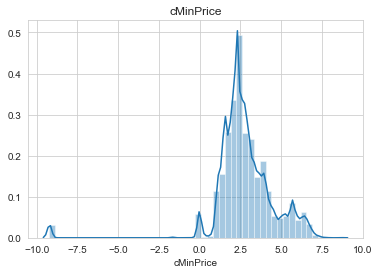

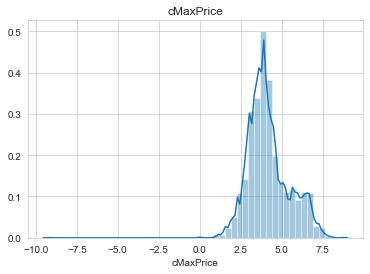

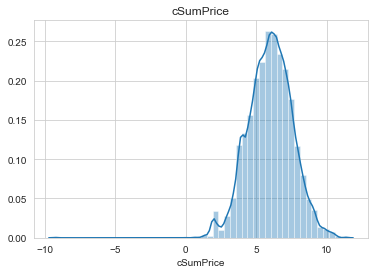

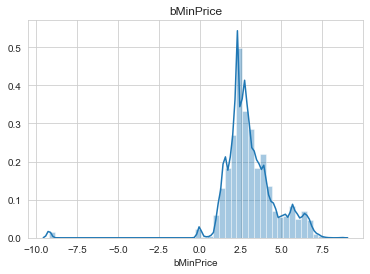

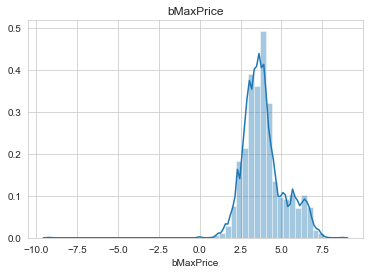

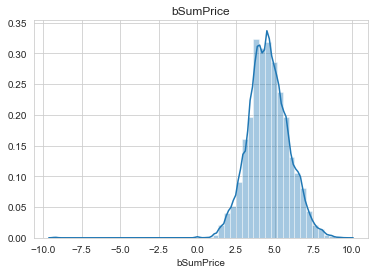

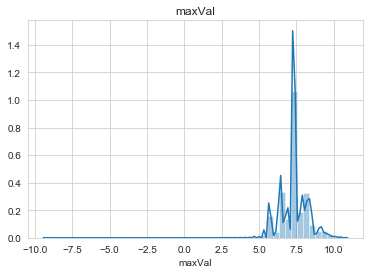

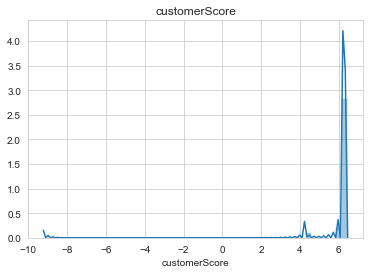

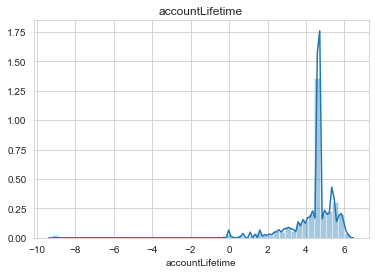

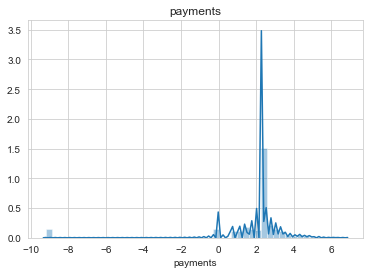

In [91]:
for feature in num_feature:
    sns.distplot(df[feature].dropna())
    plt.title(feature)
    plt.show()

### Cat/Numerical/Ordinal Feature

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null float64
availability       99723 non-null object
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null float64
lastOrder          99723 non-null float64
order              99723 non-null object
dtypes: float64(15), int64(3), object(2)
memory usage: 18.

In [93]:
cat_dtype = pd.api.types.CategoricalDtype(ordered=True)

In [94]:
df['bStep'] = df['bStep'].astype(cat_dtype)

In [95]:
df['availability'] = df['availability'].astype(cat_dtype)

In [96]:
df['address'] = df['address'].astype('category')
df['order'] = df['order'].astype('category')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null category
availability       99723 non-null category
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null category
lastOrder          99723 non-null float64
order              99723 non-null category
dtypes: category(4), float64(13), int64(3)
memory us

In [98]:
df_train = df.copy()

In [99]:
df = pd.get_dummies(data=df, columns=['bStep','availability','address'])


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 32 columns):
startHour                                   99723 non-null int64
duration                                    99723 non-null float64
cCount                                      99723 non-null int64
cMinPrice                                   99723 non-null float64
cMaxPrice                                   99723 non-null float64
cSumPrice                                   99723 non-null float64
bCount                                      99723 non-null int64
bMinPrice                                   99723 non-null float64
bMaxPrice                                   99723 non-null float64
bSumPrice                                   99723 non-null float64
maxVal                                      99723 non-null float64
customerScore                               99723 non-null float64
accountLifetime                             99723 non-null float64
payments                 

### FEATURE SCALING

In [101]:
feature_scale=[feature for feature in df.columns if feature not in ['order']]

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

disini saya menggunakan minmax scaler untuk melakukan scaling pada data yang ada

In [103]:
df.head()

,startHour,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,maxVal,customerScore,accountLifetime,payments,age,lastOrder,order,bStep_1.0,bStep_2.0,bStep_3.0,bStep_4.0,bStep_5.0,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not determinable,availability_mainly not orderable,availability_mainly orderable,availability_mixed,address_1.0,address_2.0,address_3.0
0,6,0.000,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,4.248497,3.044527,0.000100,43.0,49.0,y,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,6,11.940,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,4.248497,3.044527,0.000100,43.0,49.0,y,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,6,39.887,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,4.248497,3.044527,0.000100,43.0,49.0,y,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,6,0.000,0,2.564188,3.911825,6.02277,0,2.769465,3.688632,4.542764,7.31322,6.251904,4.653961,2.302595,51.0,33.0,y,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
5,6,26.235,0,2.564188,3.911825,6.02277,0,2.769465,3.688632,4.542764,7.31322,6.251904,4.653961,2.302595,33.0,33.0,y,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


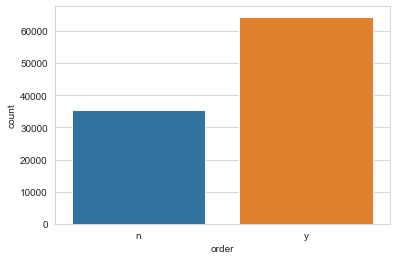

In [153]:
sns.set_style('whitegrid')
sns.countplot(x='order',data = df) ## visualisasi data yang melakukan order dan tidak

## Feature Selection

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.order)
Y = le.transform(df.order) 
X = df.drop("order",axis=1)

In [105]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

f_sel = SelectFromModel(Lasso(alpha=0.005, random_state=0))
f_sel.fit(X_train, Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 31 columns):
startHour                                   99723 non-null int64
duration                                    99723 non-null float64
cCount                                      99723 non-null int64
cMinPrice                                   99723 non-null float64
cMaxPrice                                   99723 non-null float64
cSumPrice                                   99723 non-null float64
bCount                                      99723 non-null int64
bMinPrice                                   99723 non-null float64
bMaxPrice                                   99723 non-null float64
bSumPrice                                   99723 non-null float64
maxVal                                      99723 non-null float64
customerScore                               99723 non-null float64
accountLifetime                             99723 non-null float64
payments                 

In [107]:
f_sel.get_support()

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False])

In [108]:
selected_f = X.columns[(f_sel.get_support())]

In [109]:
selected_f

Index(['startHour', 'cCount', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice',
       'bMaxPrice', 'bSumPrice', 'maxVal', 'accountLifetime', 'payments',
       'age', 'lastOrder', 'bStep_1.0', 'bStep_2.0', 'bStep_5.0'],
      dtype='object')

In [110]:
X = X[selected_f]

In [111]:
X.head()

,startHour,cCount,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,maxVal,accountLifetime,payments,age,lastOrder,bStep_1.0,bStep_2.0,bStep_5.0
0,6,1,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,3.044527,0.000100,43.0,49.0,0,1,0
1,6,1,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,3.044527,0.000100,43.0,49.0,0,1,0
2,6,1,4.094180,4.09418,1,4.094180,4.094180,4.094180,6.39693,3.044527,0.000100,43.0,49.0,1,0,0
3,6,0,3.911825,6.02277,0,2.769465,3.688632,4.542764,7.31322,4.653961,2.302595,51.0,33.0,0,1,0
5,6,0,3.911825,6.02277,0,2.769465,3.688632,4.542764,7.31322,4.653961,2.302595,33.0,33.0,0,0,0


In [112]:
X.columns

Index(['startHour', 'cCount', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice',
       'bMaxPrice', 'bSumPrice', 'maxVal', 'accountLifetime', 'payments',
       'age', 'lastOrder', 'bStep_1.0', 'bStep_2.0', 'bStep_5.0'],
      dtype='object')

## Training

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#simpan nama kolom untuk keperluan prediksi nanti 
import pickle
with open('K:\\dmw\\kuis\\kuispick2.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)


In [114]:
X_train.columns

Index(['startHour', 'cCount', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice',
       'bMaxPrice', 'bSumPrice', 'maxVal', 'accountLifetime', 'payments',
       'age', 'lastOrder', 'bStep_1.0', 'bStep_2.0', 'bStep_5.0'],
      dtype='object')

#### mengguanakn naive bayes

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))


Akurasi 0.6163950864878416
              precision    recall  f1-score   support

           0       0.47      0.64      0.54      7040
           1       0.75      0.60      0.67     12905

    accuracy                           0.62     19945
   macro avg       0.61      0.62      0.61     19945
weighted avg       0.65      0.62      0.62     19945



#### Menggunakan Decision Tree

In [116]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))


Akurasi 0.8797192278766608
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7040
           1       0.90      0.91      0.91     12905

    accuracy                           0.88     19945
   macro avg       0.87      0.87      0.87     19945
weighted avg       0.88      0.88      0.88     19945



#### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))


Akurasi 0.9281524191526699
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7040
           1       0.94      0.96      0.95     12905

    accuracy                           0.93     19945
   macro avg       0.92      0.92      0.92     19945
weighted avg       0.93      0.93      0.93     19945



In [118]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)


                 importance
cSumPrice          0.098501
age                0.084837
bMinPrice          0.083697
bSumPrice          0.082257
cCount             0.081131
cMaxPrice          0.079662
accountLifetime    0.079471
startHour          0.076087
bMaxPrice          0.072062
lastOrder          0.068187
maxVal             0.063466
payments           0.057620
bCount             0.053680
bStep_1.0          0.008616
bStep_2.0          0.006011
bStep_5.0          0.004715


In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))


[[ 6183   857]
 [  576 12329]]


In [120]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X=X, y=Y, cv=5)
print(scores)


[0.60892454 0.6099273  0.59944848 0.59391296 0.59692138]


#### Cross Val dengan algortima KNN

In [121]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
def classification_report_with_accuracy_score(y_true, y_pred):    
    print(classification_report(y_true, y_pred)) 
    print(confusion_matrix(y_true, y_pred))
    return accuracy_score(y_true, y_pred) 
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X=X, y=Y, cv=5, 
                         scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)


              precision    recall  f1-score   support

           0       0.51      0.48      0.49      7055
           1       0.72      0.74      0.73     12890

    accuracy                           0.65     19945
   macro avg       0.61      0.61      0.61     19945
weighted avg       0.65      0.65      0.65     19945

[[3399 3656]
 [3328 9562]]
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      7055
           1       0.71      0.70      0.71     12890

    accuracy                           0.62     19945
   macro avg       0.59      0.59      0.59     19945
weighted avg       0.63      0.62      0.62     19945

[[3409 3646]
 [3877 9013]]
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      7055
           1       0.71      0.70      0.71     12890

    accuracy                           0.62     19945
   macro avg       0.59      0.59      0.59     19945
weighted avg       0

#### CrossVal menggunakan algoritma RandomForest

In [122]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


def classification_report_with_accuracy_score(y_true, y_pred):    
    print(classification_report(y_true, y_pred)) 
    print(confusion_matrix(y_true, y_pred))
    return accuracy_score(y_true, y_pred) 
clf = RandomForestClassifier(n_estimators=80, random_state=123)
clf.fit(X, Y)
scores = cross_val_score(clf, X=X, y=Y, cv=5, 
                         scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)


              precision    recall  f1-score   support

           0       0.59      0.50      0.55      7055
           1       0.75      0.81      0.78     12890

    accuracy                           0.70     19945
   macro avg       0.67      0.66      0.66     19945
weighted avg       0.69      0.70      0.70     19945

[[ 3562  3493]
 [ 2428 10462]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      7055
           1       0.75      0.80      0.77     12890

    accuracy                           0.69     19945
   macro avg       0.66      0.65      0.65     19945
weighted avg       0.69      0.69      0.69     19945

[[ 3547  3508]
 [ 2618 10272]]
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      7055
           1       0.75      0.79      0.77     12890

    accuracy                           0.69     19945
   macro avg       0.66      0.65      0.65     19945
weighted avg

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 16 columns):
startHour          99723 non-null int64
cCount             99723 non-null int64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
maxVal             99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
lastOrder          99723 non-null float64
bStep_1.0          99723 non-null uint8
bStep_2.0          99723 non-null uint8
bStep_5.0          99723 non-null uint8
dtypes: float64(10), int64(3), uint8(3)
memory usage: 13.4 MB


setelah melakukan percobaan-percobaan diatas saya memilih untuk menggunakan Cross Validation dengan Random Forest, hal ini dikarenakan CV dengan random Forest memiliki hasil terbaik diantara CV yang lain, dan juga dengan menggunakan CV hasil akan lebih akurat, meskipun lebih kecil ddibandingkan dengan 80:20

In [124]:
from sklearn.externals import joblib
import pandas as pd
joblib.dump(clf, "K:\\dmw\\kuis\\kuispick2.joblib")


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['K:\\dmw\\kuis\\kuispick2.joblib']

In [125]:
df_train.head()

,startHour,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,6,0.000,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,2.0,completely orderable,6.39693,4.248497,3.044527,0.000100,43.0,1.0,49.0,y
1,6,11.940,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,2.0,completely orderable,6.39693,4.248497,3.044527,0.000100,43.0,1.0,49.0,y
2,6,39.887,1,4.094180,4.094180,4.09418,1,4.094180,4.094180,4.094180,1.0,completely orderable,6.39693,4.248497,3.044527,0.000100,43.0,1.0,49.0,y
3,6,0.000,0,2.564188,3.911825,6.02277,0,2.769465,3.688632,4.542764,2.0,completely orderable,7.31322,6.251904,4.653961,2.302595,51.0,1.0,33.0,y
5,6,26.235,0,2.564188,3.911825,6.02277,0,2.769465,3.688632,4.542764,4.0,completely orderable,7.31322,6.251904,4.653961,2.302595,33.0,2.0,33.0,y


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null category
availability       99723 non-null category
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null category
lastOrder          99723 non-null float64
order              99723 non-null category
dtypes: category(4), float64(13), int64(3)
memory us

In [127]:
cat_col = ["bStep", "availability", "address"]


## Predict

In [128]:
df_pred = pd.read_csv("K:\\dmw\\kuis\\predict_uas_des_18.txt",sep="|",na_values=["?"])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 23 columns):
sessionNo          218 non-null int64
startHour          218 non-null int64
startWeekday       218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              118 non-null float64
onlineStatus       140 non-null object
availability       140 non-null object
customerNo         180 non-null float64
maxVal             180 non-null float64
customerScore      180 non-null float64
accountLifetime    180 non-null float64
payments           180 non-null float64
age                180 non-null float64
address            180 non-null float64
lastOrder          180 non-

In [129]:
df_pred.isna().sum()

sessionNo            0
startHour            0
startWeekday         0
duration             0
cCount               0
cMinPrice            0
cMaxPrice            0
cSumPrice            0
bCount               0
bMinPrice            0
bMaxPrice            0
bSumPrice            0
bStep              100
onlineStatus        78
availability        78
customerNo          38
maxVal              38
customerScore       38
accountLifetime     38
payments            38
age                 38
address             38
lastOrder           38
dtype: int64

In [130]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 23 columns):
sessionNo          218 non-null int64
startHour          218 non-null int64
startWeekday       218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              118 non-null float64
onlineStatus       140 non-null object
availability       140 non-null object
customerNo         180 non-null float64
maxVal             180 non-null float64
customerScore      180 non-null float64
accountLifetime    180 non-null float64
payments           180 non-null float64
age                180 non-null float64
address            180 non-null float64
lastOrder          180 non-

In [131]:
df_pred = df_pred[df_pred.isna().sum(axis=1) < 15]


In [132]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 23 columns):
sessionNo          218 non-null int64
startHour          218 non-null int64
startWeekday       218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              118 non-null float64
onlineStatus       140 non-null object
availability       140 non-null object
customerNo         180 non-null float64
maxVal             180 non-null float64
customerScore      180 non-null float64
accountLifetime    180 non-null float64
payments           180 non-null float64
age                180 non-null float64
address            180 non-null float64
lastOrder          180 non-

In [133]:
df_pred = df_pred.drop(['sessionNo', 'startWeekday','onlineStatus','customerNo'],axis=1)

In [134]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 19 columns):
startHour          218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              118 non-null float64
availability       140 non-null object
maxVal             180 non-null float64
customerScore      180 non-null float64
accountLifetime    180 non-null float64
payments           180 non-null float64
age                180 non-null float64
address            180 non-null float64
lastOrder          180 non-null float64
dtypes: float64(15), int64(3), object(1)
memory usage: 34.1+ KB


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null category
availability       99723 non-null category
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null category
lastOrder          99723 non-null float64
order              99723 non-null category
dtypes: category(4), float64(13), int64(3)
memory us

#### Handle Missing value pada datapredict


Dikarenakan pada data predict memiliki nilai null, saya menggunakan metoda yang sama untuk mengisi nilai null tersebut berdasarkan data pada data training.

In [136]:
s = df_train.bStep.value_counts(normalize=True)
missing = df_pred['bStep'].isnull()
df_pred.loc[missing,'bStep'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values)

s = df_train.availability.value_counts(normalize=True)
missing = df_pred['availability'].isnull()
df_pred.loc[missing,'availability'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values)

In [137]:
missing = df_pred['maxVal'].isnull()
df_pred.loc[missing,'maxVal'] = df_train.maxVal.median()
df_pred.loc[missing,'customerScore'] = df_train.customerScore.median()
df_pred.loc[missing,'accountLifetime'] = df_train.accountLifetime.median()
df_pred.loc[missing,'payments'] = df_train.payments.median()
df_pred.loc[missing,'lastOrder'] = df_train.lastOrder.median()

s = df_train.age.value_counts(normalize=True)
print(s)
df_pred.loc[missing,'age'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values) 
s = df_train.address.value_counts(normalize=True)
print(s)
df_pred.loc[missing,'address'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values) 



46.0    0.036461
43.0    0.036230
44.0    0.034054
53.0    0.032701
51.0    0.032400
          ...   
86.0    0.000511
83.0    0.000441
18.0    0.000361
90.0    0.000221
17.0    0.000090
Name: age, Length: 71, dtype: float64
2.0    0.730965
1.0    0.268053
3.0    0.000983
Name: address, dtype: float64


In [138]:
missing = df_pred['lastOrder'].isnull()
df_pred.loc[missing,'lastOrder'] = df_train.lastOrder.median()

s = df_train.age.value_counts(normalize=True)
print(s)
df_pred.loc[missing,'age'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values) 
s = df_train.address.value_counts(normalize=True)
print(s)
df_pred.loc[missing,'address'] = np.random.choice(s.index, size=len(df_pred[missing]),p=s.values) 



46.0    0.036461
43.0    0.036230
44.0    0.034054
53.0    0.032701
51.0    0.032400
          ...   
86.0    0.000511
83.0    0.000441
18.0    0.000361
90.0    0.000221
17.0    0.000090
Name: age, Length: 71, dtype: float64
2.0    0.730965
1.0    0.268053
3.0    0.000983
Name: address, dtype: float64


In [139]:
df_pred.isna().sum()

startHour          0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
availability       0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
dtype: int64

In [140]:
df_pred.head()

,startHour,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
0,18,136.833,3,39.99,39.99,79.98,1,39.99,39.99,39.99,2.0,completely orderable,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
1,18,189.984,3,39.99,39.99,79.98,1,39.99,39.99,39.99,2.0,completely orderable,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
2,18,342.894,6,16.99,39.99,113.96,2,16.99,39.99,56.98,2.0,completely orderable,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
3,18,411.051,8,16.99,39.99,149.94,3,16.99,39.99,74.97,2.0,completely orderable,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
4,18,460.049,10,16.99,39.99,189.92,4,16.99,39.99,94.96,1.0,completely orderable,1300.0,489.0,188.0,5.0,49.0,1.0,65.0


In [141]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 19 columns):
startHour          218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              218 non-null float64
availability       218 non-null object
maxVal             218 non-null float64
customerScore      218 non-null float64
accountLifetime    218 non-null float64
payments           218 non-null float64
age                218 non-null float64
address            218 non-null float64
lastOrder          218 non-null float64
dtypes: float64(15), int64(3), object(1)
memory usage: 34.1+ KB


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 20 columns):
startHour          99723 non-null int64
duration           99723 non-null float64
cCount             99723 non-null int64
cMinPrice          99723 non-null float64
cMaxPrice          99723 non-null float64
cSumPrice          99723 non-null float64
bCount             99723 non-null int64
bMinPrice          99723 non-null float64
bMaxPrice          99723 non-null float64
bSumPrice          99723 non-null float64
bStep              99723 non-null category
availability       99723 non-null category
maxVal             99723 non-null float64
customerScore      99723 non-null float64
accountLifetime    99723 non-null float64
payments           99723 non-null float64
age                99723 non-null float64
address            99723 non-null category
lastOrder          99723 non-null float64
order              99723 non-null category
dtypes: category(4), float64(13), int64(3)
memory us

In [143]:
cat_col

['bStep', 'availability', 'address']

In [144]:
df_train['address'].cat.categories

Float64Index([1.0, 2.0, 3.0], dtype='float64')

In [145]:
from pandas.api.types import CategoricalDtype
for col in cat_col: 
    df_pred[col] = df_pred[col].astype(CategoricalDtype(df_train[col].cat.categories))


In [146]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 19 columns):
startHour          218 non-null int64
duration           218 non-null float64
cCount             218 non-null int64
cMinPrice          218 non-null float64
cMaxPrice          218 non-null float64
cSumPrice          218 non-null float64
bCount             218 non-null int64
bMinPrice          218 non-null float64
bMaxPrice          218 non-null float64
bSumPrice          218 non-null float64
bStep              218 non-null category
availability       218 non-null category
maxVal             218 non-null float64
customerScore      218 non-null float64
accountLifetime    218 non-null float64
payments           218 non-null float64
age                218 non-null float64
address            218 non-null category
lastOrder          218 non-null float64
dtypes: category(3), float64(13), int64(3)
memory usage: 30.3 KB


In [147]:
df_pred2 = pd.get_dummies(data=df_pred, columns=['bStep','availability','address'])

In [148]:
df_pred2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 31 columns):
startHour                                   218 non-null int64
duration                                    218 non-null float64
cCount                                      218 non-null int64
cMinPrice                                   218 non-null float64
cMaxPrice                                   218 non-null float64
cSumPrice                                   218 non-null float64
bCount                                      218 non-null int64
bMinPrice                                   218 non-null float64
bMaxPrice                                   218 non-null float64
bSumPrice                                   218 non-null float64
maxVal                                      218 non-null float64
customerScore                               218 non-null float64
accountLifetime                             218 non-null float64
payments                                    218 non-null

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99723 entries, 0 to 100001
Data columns (total 32 columns):
startHour                                   99723 non-null int64
duration                                    99723 non-null float64
cCount                                      99723 non-null int64
cMinPrice                                   99723 non-null float64
cMaxPrice                                   99723 non-null float64
cSumPrice                                   99723 non-null float64
bCount                                      99723 non-null int64
bMinPrice                                   99723 non-null float64
bMaxPrice                                   99723 non-null float64
bSumPrice                                   99723 non-null float64
maxVal                                      99723 non-null float64
customerScore                               99723 non-null float64
accountLifetime                             99723 non-null float64
payments                 

In [150]:
import pickle
with open ('K:\\dmw\\kuis\\kuispick2.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))
    
df_pred2 = df_pred2[X_train_column]  


### Result

In [151]:
from sklearn.externals import joblib
clf = joblib.load("K:\\dmw\\kuis\\kuispick2.joblib")
a = clf.predict(df_pred2)


In [152]:
print(a)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
